# Solving Ordinary Differential Equations

Differential equations form the basis of mathematical models in a wide range of fields – from engineering and physical sciences to finance and biological sciences. Differential equations are relations between unknown functions and their derivatives. Computing numerical solutions to differential equations is one of the most important tasks in numerical computing.

Learning objectives:
 - Euler method
 - Midpoint method
 - Classical Runge-Kutta method
 - Adaptive ODE solvers

In [1]:
% In Octave, we need to load odepkg
pkg load odepkg

## Euler method

The *initial value problem* for an ordinary differential equation involves finding a function $y(t)$ given its slope at $t$,
$$y'(t) = f(t,y(t))$$
together with an initial condition
$$y(t_0) = y_0.$$

Here, $y'(t)$ denotes $\dfrac{dy(t)}{dt}$, the derivative of $y(t)$.

A numerical solution to this problem generates a sequence of values for the independent variable, $t_0, t_1, \dots$, and a corresponding sequence of values for the dependent variable, $y_0, y_1, \dots$, so that each $y_k$ approximates the solution at $t_k$:
$$y_k ≈ y(t_k), k = 0,1,\dots$$

Recall that the derivative of $y(t)$, which is the slope of the tangent line, can be approximated by the slope of secant line passing through the point $(t, y)$:
$$y'(t) \approx \frac{y(t + h) - y(t)}{h}$$
where $h$ is a step size. As $h$ tends to zero, the approximation approaches the true derivative.

Therefore, we have 
$$y(t_k+h) \approx y(t_k) + h y'(t_k), k = 0,1,\dots$$

This is the basis of the Euler method. It is not particularly useful in practice, but it illustrates the basic idea in solving ODEs.

The following code implements the Euler method. It evaluates $f$ once per step.

In [2]:
function yout = ode1(F, t0, h, tfinal, y0)
% ODE1  A simple ODE solver.
%   yout = ODE1(F,t0,h,tfinal,y0) uses Euler's
%   method with fixed step size h on the interval
%      t0 <= t <= tfinal
%   to solve
%      dy/dt = F(t,y)
%   with y(t0) = y0.

y = y0;
yout = y;
for t = t0 : h : tfinal-h
    s = F(t,y);
    y = y + h*s;
    yout = [yout; y];
end
end

Euler's method is the same as computing compound interest. Let us do a compound interest problem.

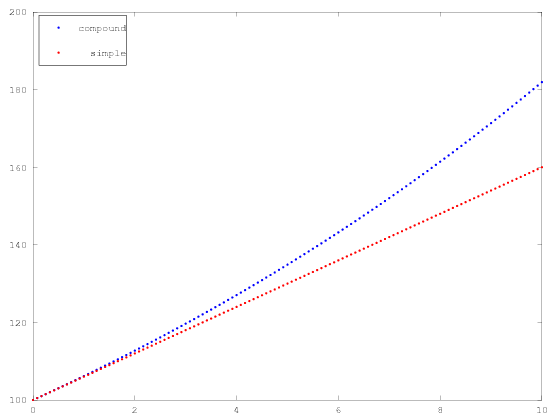

In [3]:
% Suppose we start with initial $100
y0 = 100;

% We define the interest rate to be 0.06 (annual)
a = 0.06;

% Define an anonymous function
F = @(t, y) a * y;

% start time
t0 = 0;

% end time
tfinal = 10;

% Step is by month
h = 1/12;

% Solve using Euler method
compound = ode1(F, t0, h, tfinal, y0);

% Plot it against simple interest
ts = 0:h:tfinal;

simple = 100 * (1 + ts * 0.06);

plot(ts, compound, 'b.', ts, simple, 'r.');
legend('compound', 'simple', 'Location', 'NorthWest')

## Midpoint method

The midpoint method evaluates $f$ twice per step. It uses the slope in the Euler method to estimate the slope at the mid-point.

\begin{align}
s_1 & = f(t_k, y_k),\\
s_2 & = f(t_k+\tfrac{h}{2}, y_k+\tfrac{h}{2}s_1), \\
y_{k+1} & = y_k + h s_2.
\end{align}

The following function implements the Midpoint method.

In [4]:
function yout = ode2(F,t0,h,tfinal,y0)
% ODE2  A simple ODE solver.
%   yout = ODE2(F,t0,h,tfinal,y0) uses a midpoint
%   rule with fixed step size h on the interval
%      t0 <= t <= tfinal
%   to solve
%      dy/dt = F(t,y)
%   with y(t0) = y0.

   y = y0;
   yout = y;
   for t = t0 : h : tfinal-h
      s1 = F(t,y);
      s2 = F(t+h/2, y+h*s1/2);
      y = y + h*s2;
      yout = [yout; y];
   end
end

The following example evaluates a trig function:
\begin{align}
y'(t) &= \sqrt{1-y^2}, \\
y(0) & = 0,\\
\end{align}

for $0 \leq t \leq \dfrac{\pi}{2}$.

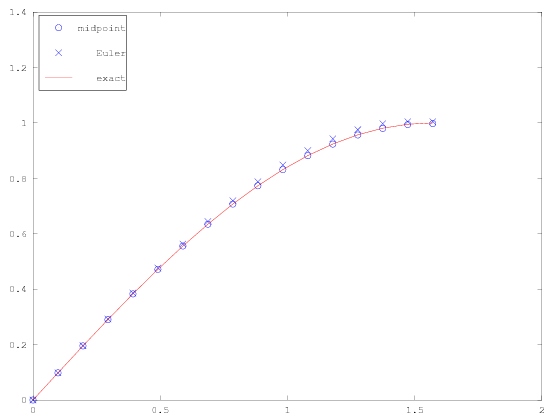

In [5]:
% Define an anonymous function
F = @(t, y) sqrt(1-y^2);

% start time
t0 = 0;
y0 = 0;

% end time
tfinal = pi/2;

% Step length
h = pi/32;

% Solve using midpoint method
y = ode2(F, t0, h, tfinal, y0);

% Plot it against true solution
ts = 0:h:tfinal;
exact = sin(ts);

plot(ts, y, 'bo', ts, ode1(F, t0, h, tfinal, y0), 'x', ts, exact, 'r-');
legend('midpoint', 'Euler', 'exact', 'Location', 'NorthWest')

The midpoint method is more accurate than Euler method.

## Classical Runge-Kutta method

The classic Runge-Kutta method is the most widely used numerical method for ODEs over the past 100 years. It evaluates $f$ four times per step.

\begin{align}
s_1 & = f(t_k, y_k),\\
s_2 & = f(t_k+\tfrac{h}{2}, y_k+\tfrac{h}{2}s_1), \\
s_3 & = f(t_k+\tfrac{h}{2}, y_k+\tfrac{h}{2}s_2), \\
s_4 & = f(t_k+h, y_k+h s_3), \\
y_{k+1} & = y_k + \tfrac{h}{6}(s_1 + 2s_2 + 2s_3 + s_4).
\end{align}

The following function implements the method.

In [6]:
function yout = ode4(F,t0,h,tfinal,y0)
% ODE4  Classical Runge-Kutta ODE solver.
%   yout = ODE4(F,t0,h,tfinal,y0) uses the classical
%   Runge-Kutta method with fixed step size h on the interval
%      t0 <= t <= tfinal
%   to solve
%      dy/dt = F(t,y)
%   with y(t0) = y0.

   y = y0;
   yout = y;
   for t = t0 : h : tfinal-h
      s1 = F(t,y);
      s2 = F(t+h/2, y+h*s1/2);
      s3 = F(t+h/2, y+h*s2/2);
      s4 = F(t+h, y+h*s3);
      y = y + h*(s1 + 2*s2 + 2*s3 + s4)/6;
      yout = [yout; y];
   end
end

Here is a simple model of the growth of a flame:
\begin{align}
y'(t) & = y^2 - y^3 \\
y(0) & = y_0
\end{align}
for $0 \leq t \leq \dfrac{2}{y_0}$.
[<img src="https://drive.google.com/uc?export=download&id=0ByTwsK5_Tl_PZ2s4WllSR1prZ0E" width="400">](https://www.mathworks.com/videos/solving-odes-in-matlab-3-classical-runge-kutta-ode4-117528.html)

Here, $y$ denotes the radius of the flame.

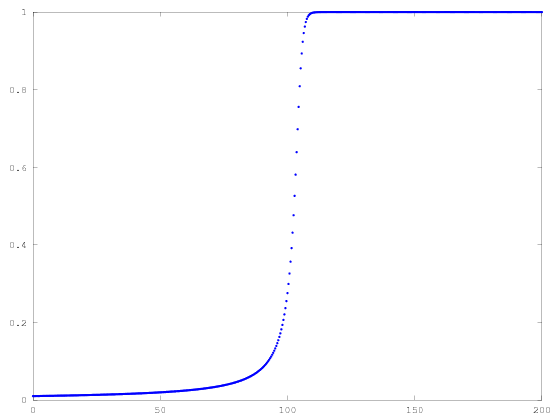

In [7]:
% Define an anonymous function
F = @(t, y) (y^2 - y^3);

% start time
t0 = 0;
y0 = 0.01;

% end time
tfinal = 200;

% Step length
h = 200/500;

% Solve using Runge-Kutta method
y = ode4(F, t0, h, tfinal, y0);

ts = 0:h:tfinal;
exact = sin(ts);

plot(ts, y, '.');

The classical Runge-Kutta method is even more accurate than midpoint method. Its major shortcoming is the lack of an error estimate.

## Order of Method

The order of an ODE method is $p$ if the global error in $\mathcal{O}(h^p)$.

The Euler method is order $1$. The Midpoint method is order $2$. The Runge-Kutta method is order $4$.

We can verify their order numerically using the following code.

In [8]:
function p = orderx(odex)
% ORDER  Experiment to determine order
% of ODE solver.
% Integrate 1/(1+t)^2 from 0 to 1.
% Exact value:

   vexact = 0.5;
   F = @(t,y) 1/(1+t)^2;
   t0 = 0;
   tfinal = 1;
   y0 = 0;
   h = 0.1;
   yout = odex(F,t0,h,tfinal,y0);
   v1 = yout(end);
   h = h/2;
   yout = odex(F,t0,h,tfinal,y0);
   v2 = yout(end);
   ratio = (v1 - vexact)/(v2 - vexact);
   p = round(log2(ratio));
end

In [9]:
orderx(@ode1)

ans =  1


In [10]:
orderx(@ode2)

ans =  2


In [11]:
orderx(@ode4)

ans =  4


## Adaptive ODE solvers

Modern ODE software automatically choose the step size and maintain a specified accuracy. It automatically estimates errors using methods of different orders. 

For example, ODE23 uses a third-order method as the base method and a second-order method to estimate the error, due to Bogacki and Shampine. It is the simplest MATLAB solver, and is suitable for coarse accuracy requirements such as computer graphics.

The following function is a simplified implementation of ode23.

In [12]:
function [tout,yout] = ode23tx(F,tspan,y0,arg4,varargin)
%ODE23TX  Solve non-stiff differential equations.  Textbook version of ODE23.
%
%   ODE23TX(F,TSPAN,Y0) with TSPAN = [T0 TFINAL] integrates the system
%   of differential equations dy/dt = f(t,y) from t = T0 to t = TFINAL.
%   The initial condition is y(T0) = Y0.
%
%   The first argument, F, is a function handle or an anonymous function
%   that defines f(t,y).  This function must have two input arguments,
%   t and y, and must return a column vector of the derivatives, dy/dt.
%
%   With two output arguments, [T,Y] = ODE23TX(...) returns a column 
%   vector T and an array Y where Y(:,k) is the solution at T(k).
%
%   With no output arguments, ODE23TX plots the emerging solution.
%
%   ODE23TX(F,TSPAN,Y0,RTOL) uses the relative error tolerance RTOL
%   instead of the default 1.e-3.
%
%   ODE23TX(F,TSPAN,Y0,OPTS) where OPTS = ODESET('reltol',RTOL, ...
%   'abstol',ATOL,'outputfcn',@PLOTFUN) uses relative error RTOL instead
%   of 1.e-3, absolute error ATOL instead of 1.e-6, and calls PLOTFUN
%   instead of ODEPLOT after each successful step.
%
%   More than four input arguments, ODE23TX(F,TSPAN,Y0,RTOL,P1,P2,...),
%   are passed on to F, F(T,Y,P1,P2,...).
%
%   ODE23TX uses the Runge-Kutta (2,3) method of Bogacki and Shampine (BS23).
%
%   Example    
%      tspan = [0 2*pi];
%      y0 = [1 0]';
%      F = @(t,y) [0 1; -1 0]*y;
%      ode23tx(F,tspan,y0);
%
%   See also ODE23.

%   Copyright 2012 - 2015 The MathWorks, Inc.

% Initialize variables.

rtol = 1.e-3;
atol = 1.e-6;
plotfun = @odeplot;
if nargin >= 4 && isnumeric(arg4)
   rtol = arg4;
elseif nargin >= 4 && isstruct(arg4)
   if ~isempty(arg4.RelTol), rtol = arg4.RelTol; end
   if ~isempty(arg4.AbsTol), atol = arg4.AbsTol; end
   if ~isempty(arg4.OutputFcn), plotfun = arg4.OutputFcn; end
end
t0 = tspan(1);
tfinal = tspan(2);
tdir = sign(tfinal - t0);
plotit = (nargout == 0);
threshold = atol / rtol;
hmax = abs(0.1*(tfinal-t0));
t = t0;
y = y0(:);

% Initialize output.

if plotit
   plotfun(tspan,y,'init');
else
   tout = t;
   yout = y.';
end

% Compute initial step size.

s1 = F(t, y, varargin{:});
r = norm(s1./max(abs(y),threshold),inf) + realmin;
h = tdir*0.8*rtol^(1/3)/r;

% The main loop.

while t ~= tfinal
  
   hmin = 16*eps*abs(t);
   if abs(h) > hmax, h = tdir*hmax; end
   if abs(h) < hmin, h = tdir*hmin; end
   
   % Stretch the step if t is close to tfinal.

   if 1.1*abs(h) >= abs(tfinal - t)
      h = tfinal - t;
   end
   
   % Attempt a step.

   s2 = F(t+h/2, y+h/2*s1, varargin{:});
   s3 = F(t+3*h/4, y+3*h/4*s2, varargin{:});
   tnew = t + h;
   ynew = y + h*(2*s1 + 3*s2 + 4*s3)/9;
   s4 = F(tnew, ynew, varargin{:});
      
   % Estimate the error.

   e = h*(-5*s1 + 6*s2 + 8*s3 - 9*s4)/72;
   err = norm(e./max(max(abs(y),abs(ynew)),threshold),inf) + realmin;
      
   % Accept the solution if the estimated error is less than the tolerance.

   if err <= rtol
      t = tnew;
      y = ynew;
      if plotit
         if plotfun(t,y,'');
            break
         end
      else
         tout(end+1,1) = t;
         yout(end+1,:) = y.';
      end
      s1 = s4;     % Reuse final function value to start new step.
   end
   
   % Compute a new step size.

   h = h*min(5,0.8*(rtol/err)^(1/3));
 
   % Exit early if step size is too small.
   
   if abs(h) <= hmin
      warning('Step size %e too small at t = %e.\n',h,t);
      t = tfinal;
   end
end

if plotit
   plotfun([],[],'done');
end
end

The following solves the problem $y'(x)=y$.

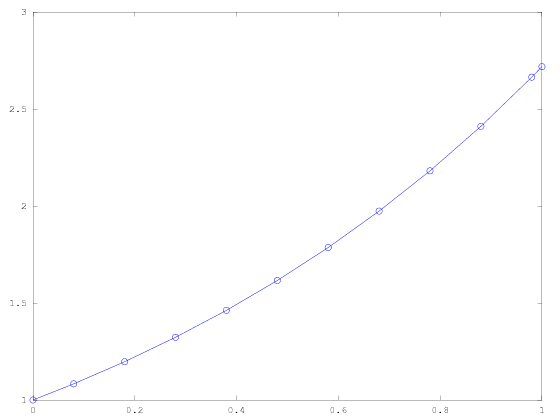

In [13]:
F = @(t, y) y;
[ts, ys] = ode23tx(F, [0, 1], 1);
plot(ts, ys, '-o')

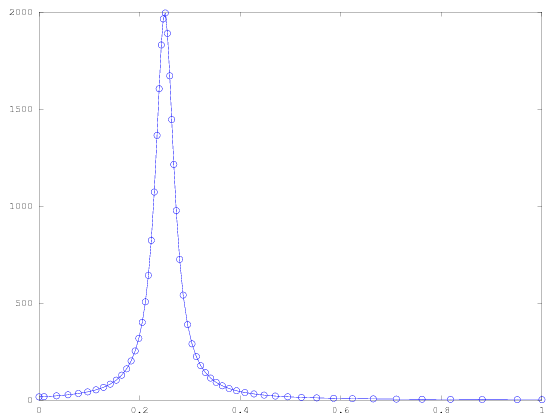

In [14]:
a = 0.25;
y0 = 15.9;
F = @(t, y) 2*(a-t) * y^2;

[ts, ys] = ode23tx(F, [0, 1], y0);
plot(ts, ys, '-o')

ODE45 is the most popular method, which uses a fifth-order method as the base method and a fourth-order method to estimate error due to Dormand and Prince. It requires six function evaluations per step.

    ode45 at line 113 column 5
    ode45 at line 113 column 5


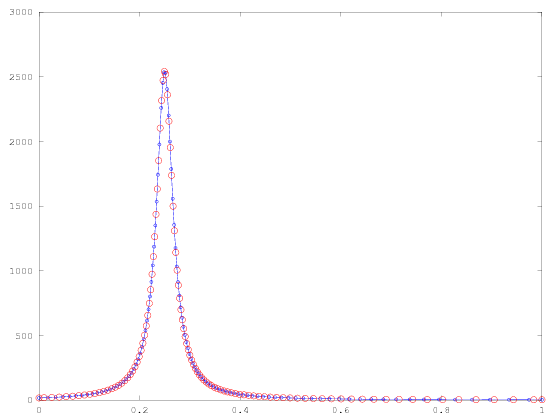

In [15]:
a = 0.25;
y0 = 15.9;
F = @(t, y) 2*(a-t) * y^2;

[ts, ys] = ode45(F, [0, 1], y0);
plot(ts, ys, 'b-o', 'MarkerSize', 3)
hold on;
opts = odeset;
opts.Refine =  1;
[ts, ys] = ode45(F, [0, 1], y0, opts);
plot(ts, ys, 'ro', 'MarkerSize', 6)

## Stiff ODEs

A problem is said to be stiff if the solution being sought varies slowly, but there are nearby solutions that vary rapidly, so the numerical method must take small steps to obtain satisfactory results. The flame model demonstrates stiffness. 

ODE solvers with names ending in "s", such as ODE23s and ODE15s, employ implicit methods and are intended for stiff problems. These methods require more work per step, but take far fewer steps.

For example, the flame model is very stiff with small y0.

    ode45 at line 124 column 5


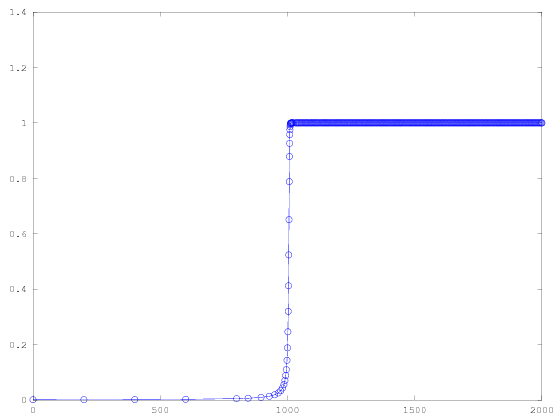

In [16]:
% Define an anonymous function
F = @(t, y) (y^2 - y^3);

% start time
t0 = 0;
y0 = 0.001;

% end time
tfinal = 2/y0;

opts = odeset;
opts.RelTol = 1.e-5;

% Solve using ODE45
[ts, ys] = ode45(F, [0, tfinal], y0, opts);
plot(ts, ys, '-o')

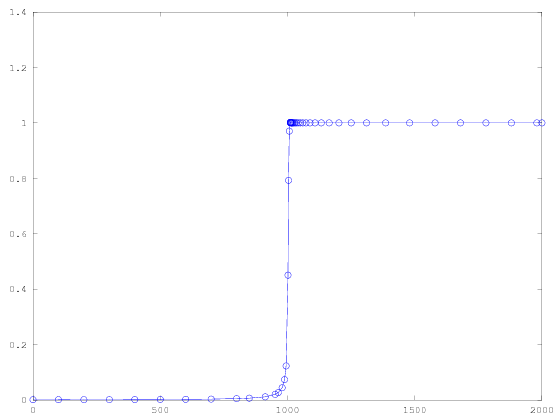

In [17]:
% Solve using ode23s
opts = odeset;
opts.RelTol = 1.e-5;
opts.MaxStep = 100;

[ts, ys] = ode23s(F, [0, tfinal], y0, opts);
plot(ts, ys, '-o')

% Note:  You may get different results in MATLAB than in Octave

Acknowledgment: The material in this Notebook was adapted from Cleve Moler's short videos on [Solving ODEs in MATLAB](https://www.mathworks.com/videos/series/solving-odes-in-matlab-117658.html).